In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Using Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [2]:
#function to read emails
def load_emails(folder_path, label):
    emails = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), 'r', encoding = 'latin1') as file:
            content = file.read()
            emails.append((content, label))
    return emails

spam_path = r"G:\Machine Learning\Deep Learning\Email classification\enron1\spam"
ham_path = r"G:\Machine Learning\Deep Learning\Email classification\enron1\ham"

spam_emails = load_emails(spam_path, 1)
ham_emails = load_emails(ham_path, 0)

#shuffle
all_emails = spam_emails + ham_emails
np.random.shuffle(all_emails)

#converting into a dataframe
df = pd.DataFrame(all_emails, columns = ['text', 'label'])

In [5]:
#vectorization
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 3000)
x = vectorizer.fit_transform(df['text'])
y = df['label']

In [11]:
#training Logistic Regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
#evaluation metrics
y_pred_ = model.predict(x_test)
y_pred_classes = (y_pred_>0.5).astype(int)

print(classification_report(y_test, y_pred_classes))
print('Accuracy: ', accuracy_score(y_test, y_pred_classes))
print('Precision: ', precision_score(y_test, y_pred_classes))
print('F1 Score: ', f1_score(y_test, y_pred_classes))
print('Recall: ', recall_score(y_test, y_pred_classes))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       762
           1       0.94      0.99      0.96       273

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Accuracy:  0.9806763285024155
Precision:  0.9407665505226481
F1 Score:  0.9642857142857143
Recall:  0.989010989010989


Using LSTM

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
#unzipping 
texts, labels = zip(*all_emails)
labels = np.array(labels)

In [19]:
#tokenizing and pad sequencing
tokenizer = Tokenizer(num_words = 5000, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [21]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size = 0.2, random_state = 42)

In [23]:
#LSTM Model
model = Sequential([
    Embedding(input_dim = 5000, output_dim = 64),
    LSTM(64, return_sequences = False),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
#Training the Model
history = model.fit(
    x_train, y_train,
    epochs = 5,
    batch_size = 32,
    validation_data = (x_test, y_test),
    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights = True)],
    verbose = 2
)

Epoch 1/5
130/130 - 23s - 177ms/step - accuracy: 0.9028 - loss: 0.2459 - val_accuracy: 0.9768 - val_loss: 0.0827
Epoch 2/5
130/130 - 16s - 123ms/step - accuracy: 0.9811 - loss: 0.0631 - val_accuracy: 0.9382 - val_loss: 0.1522
Epoch 3/5
130/130 - 17s - 128ms/step - accuracy: 0.9891 - loss: 0.0414 - val_accuracy: 0.9739 - val_loss: 0.0685
Epoch 4/5
130/130 - 16s - 122ms/step - accuracy: 0.9956 - loss: 0.0197 - val_accuracy: 0.9826 - val_loss: 0.0638
Epoch 5/5
130/130 - 15s - 116ms/step - accuracy: 0.9954 - loss: 0.0209 - val_accuracy: 0.9807 - val_loss: 0.0592


In [35]:
#Evaluation and report
y_prob = model.predict(x_test)
y_pred = (y_pred>0.5).astype(int)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       762
           1       0.94      0.99      0.96       273

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Accuracy:  0.9806763285024155
Precision:  0.9407665505226481
F1 Score:  0.9642857142857143
Recall:  0.989010989010989


Text(50.722222222222214, 0.5, 'Actual')

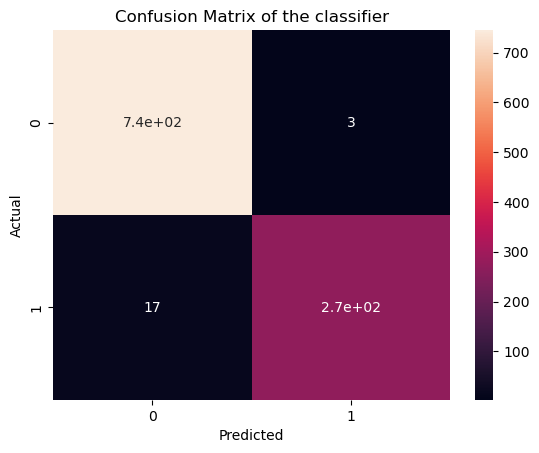

In [49]:
#visualization
conf_mat = confusion_matrix(y_pred, y_test)
sb.heatmap(conf_mat, annot = True)
plt.title('Confusion Matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')